Using TensorFlow backend.


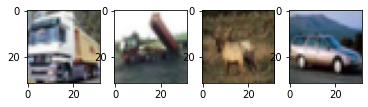

In [1]:
from keras.datasets.cifar10 import load_data
from keras.utils import np_utils
from src.models import *
from src.viz import *
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard


physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


visualize_cifar10([1,2,3,4])


def run_cfar10(name, epochs=10, lr=0.01, batch_size=32):
    (x_train, y_train), (x_test, y_test) = load_data()

    # Scale inputs from [0, 255] to [0, 1]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    # One-hot encode the target labels
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    input_shape = (32, 32, 3)
    model = create_model(name, 
                         input_shape, 
                         num_classes, 
                         epochs=epochs, 
                         lr=lr
                         )
    print(model.summary())
    print_model(model, f"img/{name}.png")

    tensorboard = TensorBoard(log_dir=f"logs/{name}")
    callbacks = [tensorboard]
    history = model.fit(x_train, 
                        y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=epochs,
                        batch_size=batch_size, 
                        verbose=1,
                        callbacks=callbacks
                        )
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    return history



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 28s 564us/sample - loss: 2.2139 - accuracy: 0.3280 - val_loss: 1.7596 - val_accuracy: 0.3701
Epoch 2/15
50000/50000 [==============================] - 28s 551us/sample - loss: 1.6918 - accuracy: 0.3974 - val_loss: 1.6607 - val_accuracy: 0.4108
Epoch 3/15
50000/50

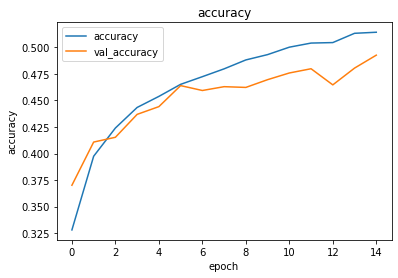

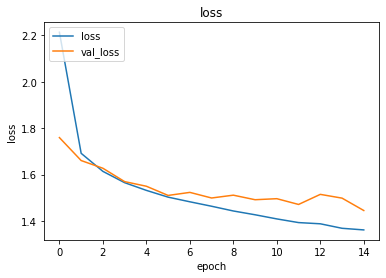

In [2]:
mlp_history = run_cfar10('cifar_mlp', epochs=15)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

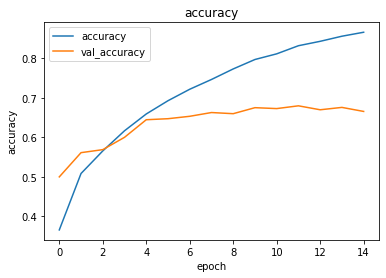

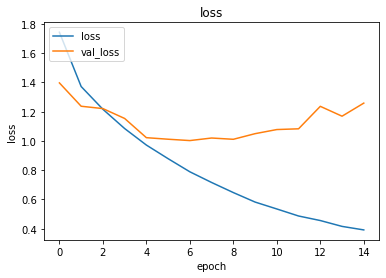

In [3]:
cnn1_history = run_cfar10('cifar_cnn_v1', epochs=15)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

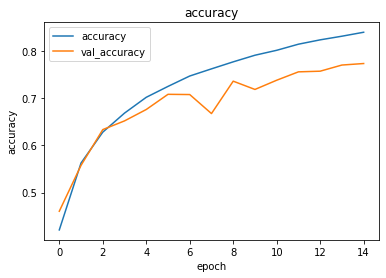

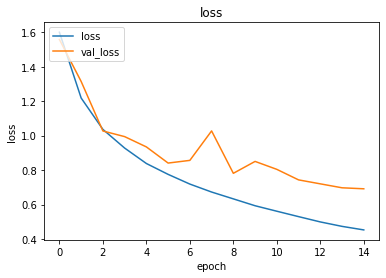

In [4]:
cnn2_history = run_cfar10('cifar_cnn_v2',
                          lr=1e-3,
                          batch_size=64,
                          epochs=15)

In [ ]:
analyse_accuracy([mlp_history, cnn1_history, cnn2_history], 
                 ['cifar_mlp', 'cnn_v1', 'cnn_v2'])

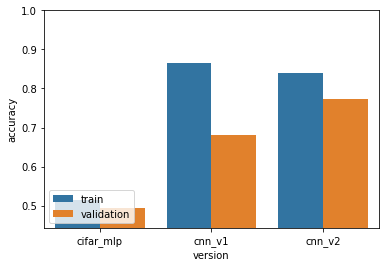

In [7]:
analyse_accuracy([mlp_history, cnn1_history, cnn2_history], 
                 ['cifar_mlp', 'cnn_v1', 'cnn_v2'])